In [1]:
import numpy as np
from datetime import date
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.cm as cmx
from sklearn.decomposition import PCA as sk_PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [2]:
cvae_samples = np.load('/gpfs/alpine/gen150/proj-shared/junqi/hea/vae_output-samples.npz', 'r')
cvae_embeddings = np.load('/gpfs/alpine/gen150/proj-shared/junqi/hea/encoded_TSNE_2D.npy', 'r').squeeze()
npzfile5 = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/pca/hea_plotting.npz')

In [3]:
predicted = cvae_samples['pred'].astype(float)
truth = cvae_samples['gtruth'].astype(float)
hea_label_validation = npzfile5['onehotmax']

In [4]:
today = date.today()
d = today.strftime("%b-%d-%Y")

In [5]:
print(cvae_embeddings.shape)

(10000, 2)


In [6]:
hea_arr = ['1500', '524', '200', '83', '50']

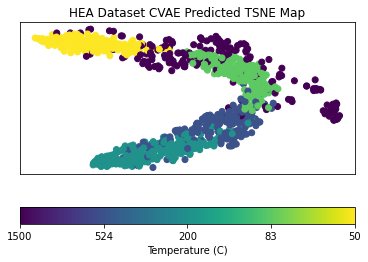

In [7]:
cNorm = matplotlib.colors.Normalize(vmin=min(hea_label_validation), vmax=max(hea_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(1)
plt.scatter(cvae_embeddings[0:1000, 0], cvae_embeddings[0:1000, 1], c=scalarMap.to_rgba(hea_label_validation))
scalarMap.set_array(hea_label_validation)
cbar = fig.colorbar(scalarMap, orientation='horizontal')
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(hea_arr)
cbar.set_label('Temperature (C)')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.title('HEA Dataset CVAE Predicted TSNE Map')
fig.savefig('hea_cvae_pred_' + d + '.png')
plt.show()